# Improved Quantile Normalization 
This notebook overviews the results of the improved quantile normalization algorithm that correctly treats missing data.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
from copy import deepcopy

def load_data(data_type):
    import numpy as np
    import matplotlib.pyplot as plt
    # %matplotlib inline
    import matplotlib
    matplotlib.style.use('ggplot')
    from clustergrammer import Network
    from copy import deepcopy

    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/precalc_processed/' + \
             data_type + '.txt'

    # load file and export dataframe
    net = deepcopy(Network())
    net.load_file(filename)
    # net.swap_nan_for_zero()
    tmp_df = net.dat_to_df()
    df = tmp_df['mat']

    return df

In [2]:
# load data
###############

# filtering
################
# data_type = 'ptm45_filter_none'
# data_type = 'ptm45_filter_col-qn'
# data_type = 'ptm45_filter_col-qn_row-zscore'

# no filtering
################
# data_type = 'ptm45_none'
data_type = 'ptm45_col-iqn'
# data_type = 'ptm45_col-qn_row-zscore'


# nan and zero version of the data
df_nans = load_data(data_type)

rows = df_nans.index.tolist()

new_rows = []
for i in range(len(rows)):
    inst_row = rows[i]
    inst_row = inst_row + str(i)
    new_rows.append(inst_row)

df_nans.index = new_rows
    

df_zeros = deepcopy(df_nans)
df_zeros[np.isnan(df_zeros)] = 0

cols = df_zeros.columns.tolist()

In [3]:
rows = df_nans.index.tolist()
cols = df_nans.columns.tolist()

print(len(rows))
print(len(cols))

print('\n')

rows = list(set(rows))
cols = list(set(cols))


print(len(rows))
print(len(cols))

8468
45


8468
45


In [4]:
col_num = 0
series_nans = df_nans[cols[col_num]]
series_zeros = df_zeros[cols[col_num]]

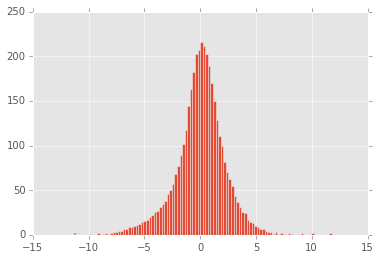

In [5]:
series_nans.hist(bins=100)

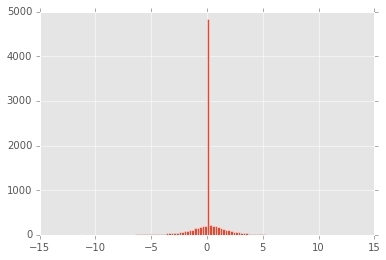

In [6]:
series_zeros.hist(bins=100)

## Scatterplot
This is a quick look at a scatterplot of PTM values from two cell lines with and withouth swapping nans for zeros

/Users/nickfernandez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


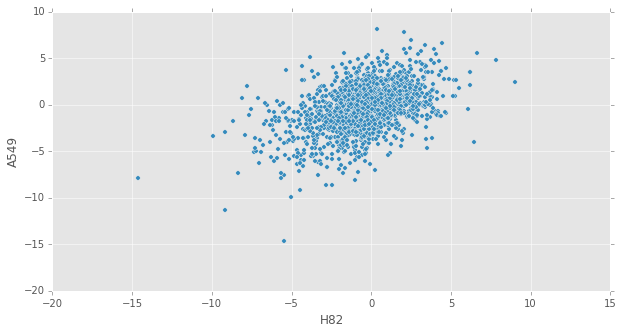

In [7]:
df_nans.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

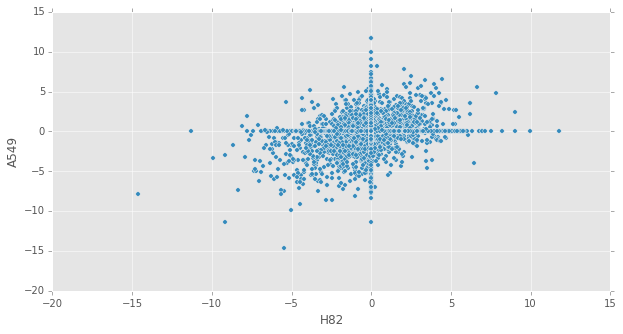

In [8]:
df_zeros.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

## Box plot
When nans are replaced with zeros, then zeros dominate the data.

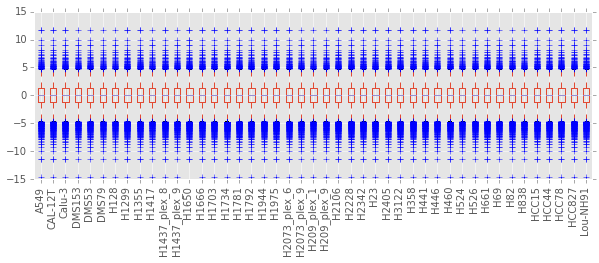

In [9]:
df_nans.plot(kind='box', figsize=(10,3), rot=90)

In [13]:
df_nans.head()

,A549,CAL-12T,Calu-3,DMS153,DMS53,DMS79,H128,H1299,H1355,H1417,...,H526,H661,H69,H82,H838,HCC15,HCC44,HCC78,HCC827,Lou-NH91
ACIN1_K810,NaN,NaN,-0.710909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.002827,NaN
ACTC1_K2401,-1.273609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.294255,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AHNAK_K10772,NaN,-1.861979,NaN,NaN,-3.418870,NaN,NaN,NaN,NaN,NaN,...,-2.224764,NaN,-1.674757,-1.323144,NaN,-3.088409,-2.330143,NaN,NaN,-2.177856
AHNAK_K12053,-1.569726,-2.080567,-2.438294,NaN,-5.308791,-4.633666,-4.177610,-3.345697,-2.893464,-8.649653,...,-3.957410,NaN,-2.784384,-2.812547,NaN,-2.940855,-2.493414,NaN,-3.302212,-2.878128
AHNAK_K13334,-1.844087,-2.515437,-2.691241,-4.057421,-4.388639,-3.553799,-2.454234,-2.493414,-2.283938,-4.422495,...,-2.679115,-1.955556,-1.908458,-1.666760,-3.197611,-3.206987,-3.078459,-2.565186,-3.674447,-2.850898


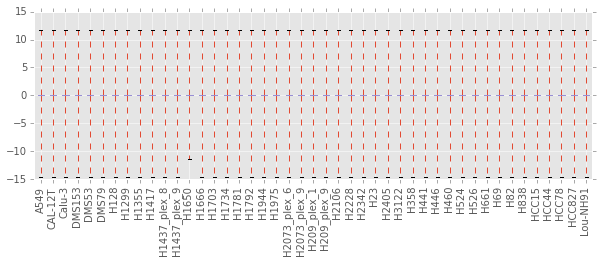

In [10]:
# adding zeros makes distributions narrow around zero
df_zeros.plot(kind='box', figsize=(10,3), rot=90)

In [11]:
df_nans.shape

(8468, 45)

In [12]:
from clustergrammer_widget import *
from copy import deepcopy

In [47]:
net = deepcopy(Network())
tmp_df = {}
tmp_df['mat'] = df_nans
net.df_to_dat(tmp_df)
net.swap_nan_for_zero()
net.normalize(axis='row', norm_type='zscore', keep_orig=True)
net.filter_N_top('row', 250, rank_type='sum')
exp_df = net.dat_to_df()


In [48]:
net.make_clust()

In [49]:
# view heatmap of data 
clustergrammer_notebook(network = net.export_net_json())